<a href="https://colab.research.google.com/github/sidkatiyar09/Data-Analytics/blob/main/capstone_gradcam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# !pip install tensorflow
# !pip install opencv-python

Found 7010 images belonging to 10 classes.
Found 1500 images belonging to 10 classes.
Found 1502 images belonging to 10 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.5394 - loss: 19.0533

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


220/220 ━━━━━━━━━━━━━━━━━━━━ 1546s 7s/step - accuracy: 0.5398 - loss: 18.9945 - val_accuracy: 0.6807 - val_loss: 1.0970
Epoch 2/5
220/220 ━━━━━━━━━━━━━━━━━━━━ 123s 558ms/step - accuracy: 0.8095 - loss: 0.6405 - val_accuracy: 0.7447 - val_loss: 1.0512
Epoch 3/5
220/220 ━━━━━━━━━━━━━━━━━━━━ 122s 556ms/step - accuracy: 0.8687 - loss: 0.4083 - val_accuracy: 0.7807 - val_loss: 0.9805
Epoch 4/5
220/220 ━━━━━━━━━━━━━━━━━━━━ 123s 558ms/step - accuracy: 0.9217 - loss: 0.2497 - val_accuracy: 0.7880 - val_loss: 0.9955
Epoch 5/5
220/220 ━━━━━━━━━━━━━━━━━━━━ 123s 557ms/step - accuracy: 0.9378 - loss: 0.1827 - val_accuracy: 0.7940 - val_loss: 1.1192


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 341s 7s/step - accuracy: 0.8300 - loss: 0.8696
Test Accuracy: 0.833555281162262


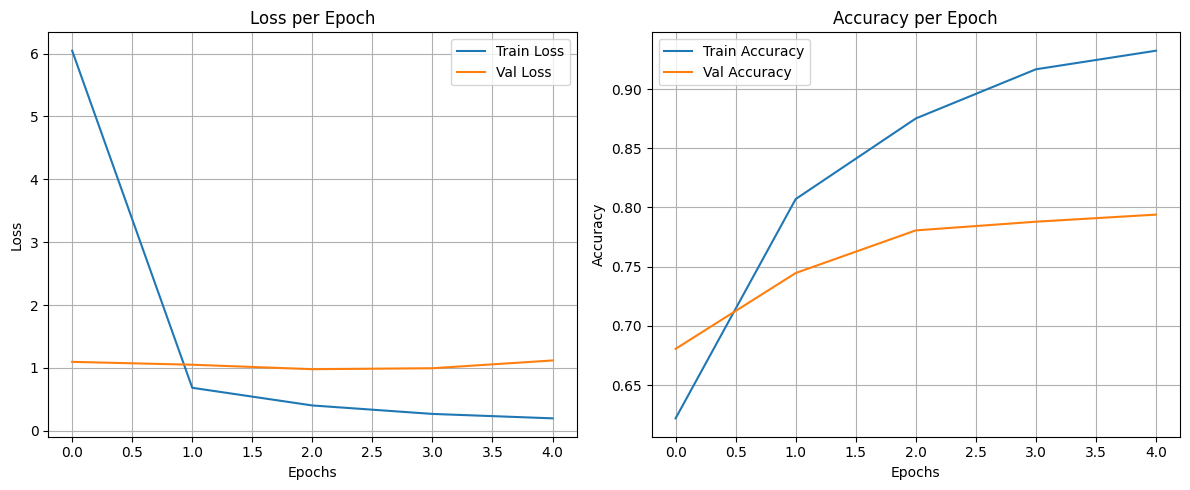

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor_22']]
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


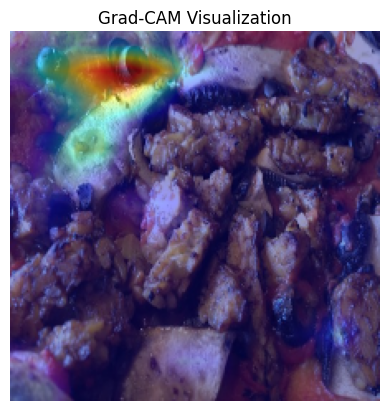

In [9]:
# CAM/Grad-CAM Visualization and Train/Test/Val Evaluation for VGG16

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K

# ============================
# LOAD PRETRAINED BASE MODEL
# ============================
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x) # Changed to 10 to match the number of classes
model = Model(inputs=base_model.input, outputs=predictions)

base_model.trainable = False
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# ============================
# LOAD DATA
# ============================
train_dir = '/content/drive/MyDrive/Capstone project 2/food_subset/train'
val_dir = '/content/drive/MyDrive/Capstone project 2/food_subset/val'
test_dir = '/content/drive/MyDrive/Capstone project 2/food_subset/test'

datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
train_data = datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')
val_data = datagen.flow_from_directory(val_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')
test_data = datagen.flow_from_directory(test_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')

# ============================
# TRAIN MODEL
# ============================
history = model.fit(train_data, epochs=5, validation_data=val_data)

# ============================
# EVALUATE MODEL
# ============================
test_loss, test_acc = model.evaluate(test_data)
print("Test Accuracy:", test_acc)

# ============================
# PLOT TRAINING HISTORY
# ============================
def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss per Epoch')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Accuracy per Epoch')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

plot_training_history(history)

# ============================
# GRAD-CAM FUNCTION
# ============================
def get_img_array(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    array = image.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    return preprocess_input(array)

def make_gradcam_heatmap(img_array, model, last_conv_layer_name):
    grad_model = Model([model.inputs], [model.get_layer(last_conv_layer_name).output, model.output])
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        class_idx = tf.argmax(predictions[0])
        loss = predictions[:, class_idx]
    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def overlay_heatmap(img_path, heatmap, alpha=0.4):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed = cv2.addWeighted(img, 1 - alpha, heatmap, alpha, 0)
    return superimposed

# ============================
# APPLY GRAD-CAM
# ============================
# Update the sample image path generation to handle subdirectories correctly
if os.path.exists(train_dir) and len(os.listdir(train_dir)) > 0:
    first_class_dir = os.path.join(train_dir, os.listdir(train_dir)[0])
    if os.path.exists(first_class_dir) and len(os.listdir(first_class_dir)) > 0:
        sample_img_path = os.path.join(first_class_dir, os.listdir(first_class_dir)[0])
        img_array = get_img_array(sample_img_path)
        heatmap = make_gradcam_heatmap(img_array, model, 'block5_conv3')
        result = overlay_heatmap(sample_img_path, heatmap)

        plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
        plt.title('Grad-CAM Visualization')
        plt.axis('off')
        plt.show()
    else:
        print(f"No images found in the first class directory: {first_class_dir}")
else:
    print(f"Training directory not found or is empty: {train_dir}")